In [ ]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
# Normalize the data
X_train, X_test = X_train/255.0, X_test/255.0
print("Train data shape:", X_train.shape)

Train data shape: (60000, 28, 28)


In [ ]:
# number of classes
K = len(set(y_train))
print("Number of classes:", K)

Number of classes: 10


In [ ]:
# The data is only 2D
# Convolution expects Height x Width x Color
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("Train data shape after reshaping:", X_train.shape)

Train data shape after reshaping: (60000, 28, 28, 1)


In [ ]:
# Build the model
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
# Compile and fit
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 40s 21ms/step - loss: 0.5178 - accuracy: 0.8074 - val_loss: 0.3960 - val_accuracy: 0.8524
Epoch 2/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3571 - accuracy: 0.8652 - val_loss: 0.3394 - val_accuracy: 0.8764
Epoch 3/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3110 - accuracy: 0.8823 - val_loss: 0.3044 - val_accuracy: 0.8842
Epoch 4/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2783 - accuracy: 0.8958 - val_loss: 0.3043 - val_accuracy: 0.8872
Epoch 5/15
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2544 - accuracy: 0.9031 - val_loss: 0.2851 - val_accuracy: 0.8956
Epoch 6/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2320 - accuracy: 0.9122 - val_loss: 0.2998 - val_accuracy: 0.8924
Epoch 7/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2165 - accuracy: 0.9173 - val_loss: 0.2996 -

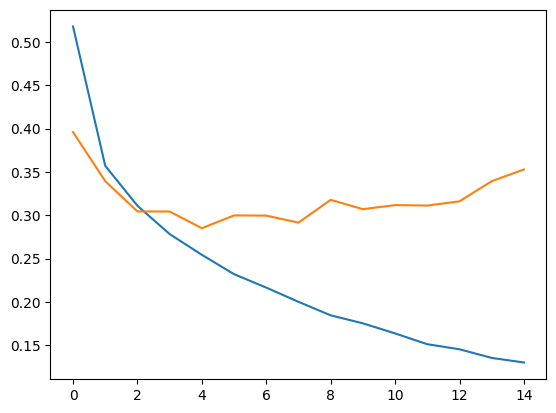

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.show()

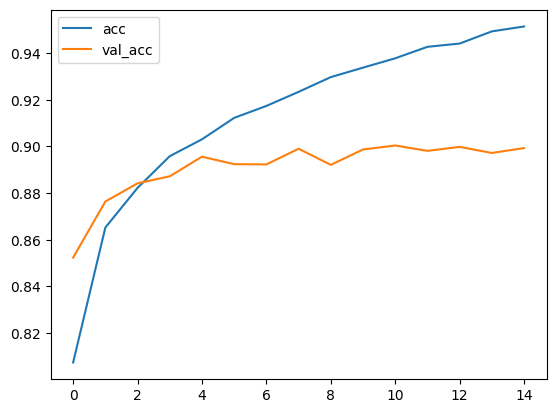

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 2s 7ms/step
Confusion matrix, without normalization
[[879   2  23  26   0   3  60   0   7   0]
 [  3 975   0  12   5   1   3   0   1   0]
 [ 14   0 880   8  52   0  42   0   4   0]
 [ 17   6  17 901  34   0  21   1   2   1]
 [  2   2  62  19 850   0  63   0   2   0]
 [  0   0   0   1   0 978   0  14   1   6]
 [148   0  86  28  95   0 623   0  20   0]
 [  0   0   0   0   0  10   0 971   0  19]
 [  3   0   6   2   4   1   5   1 977   1]
 [  1   0   0   0   0   4   0  36   0 959]]


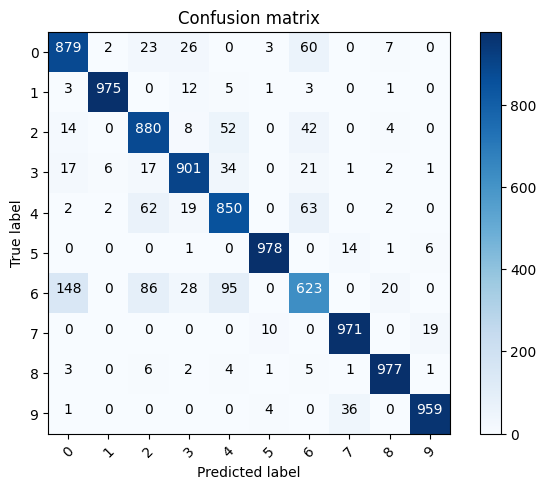

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

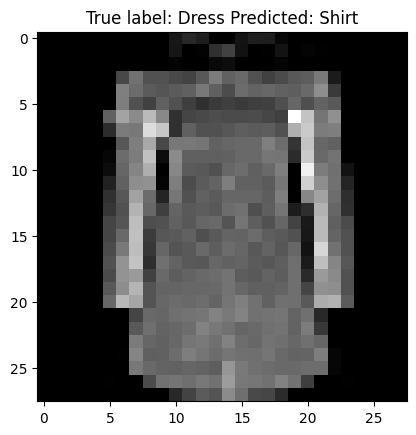

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));